<a href="https://colab.research.google.com/github/shenzhun/machine-learning-prep/blob/master/tensorflow/day5_hierarchy_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf

In [11]:
# number of samples
n = 400

X = tf.random.uniform([n, 2], minval=-10, maxval=10)
w0 = tf.constant([[2.0], [-3.0]])
b0 = tf.constant([[3.0]])

Y = X@w0 + b0 + tf.random.normal([n, 1], mean = 0.0, stddev = 2.0)

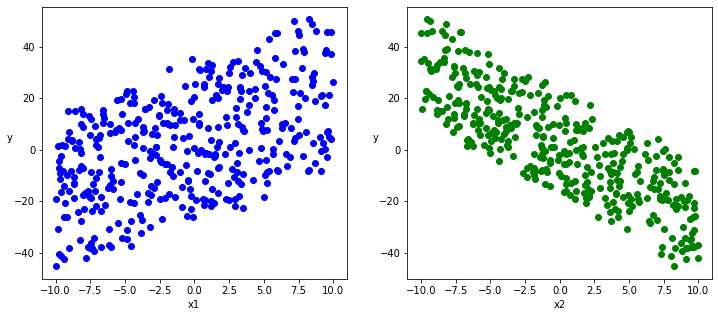

In [14]:
%matplotlib inline
%config InlineBackend.firgure_format = 'svg'

plt.figure(figsize=(12, 5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0], Y[:,0], c = "b")
plt.xlabel("x1")
plt.ylabel("y", rotation = 0)

ax2 = plt.subplot(122)
ax2.scatter(X[:,1], Y[:,0], c = "g")
plt.xlabel("x2")
plt.ylabel("y", rotation = 0)
plt.show()

In [16]:
def data_iter(features, labels, batch_size=8):
  num_examples = len(features)
  indices = list(range(num_examples))
  np.random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    indexs = indices[i: min(i + batch_size, num_examples)]
    yield tf.gather(features, indexs), tf.gather(labels, indexs)

#Testing the data pipeline
batch_size = 8
(features, labels) = next(data_iter(X, Y, batch_size))
print(features)
print(labels)


tf.Tensor(
[[-2.492578   5.6680346]
 [-3.1160283  4.2490435]
 [ 1.7097206 -4.551735 ]
 [-4.2605066 -6.266005 ]
 [ 5.7431526 -1.1479187]
 [-7.500179  -5.7807326]
 [ 2.3298378 -4.7123075]
 [ 6.540703   1.8246002]], shape=(8, 2), dtype=float32)
tf.Tensor(
[[-19.165634]
 [-14.217722]
 [ 19.890171]
 [ 10.391825]
 [ 19.464529]
 [  5.713834]
 [ 22.7035  ]
 [ 10.491571]], shape=(8, 1), dtype=float32)


In [17]:
w = tf.Variable(tf.random.normal(w0.shape))
b = tf.Variable(tf.zeros_like(b0, dtype=tf.float32))

class LinearRegression:
  def __call__(self, x):
    return x@w + b
  
  def loss_func(self, y_true, y_pred):
    return tf.reduce_mean((y_true - y_pred)** 2 / 2)

model = LinearRegression()

In [22]:
# Debug in dynamic graph
def train_step(model, features, labels):
  with tf.GradientTape() as tape:
    predications = model(features)
    loss = model.loss_func(labels, predications)
  
  dloss_dw, dloss_db = tape.gradient(loss, [w, b])

  w.assign(w - 0.001*dloss_dw)
  b.assign(b - 0.001*dloss_db)
  
  return loss

In [23]:
batch_size = 10
(features, labels) = next(data_iter(X, Y, batch_size))
train_step(model, features, labels)

<tf.Tensor: shape=(), dtype=float32, numpy=317.3514>

In [28]:
def printbar():
  print("="*40)

In [29]:
def train_model(model, epochs):
  for epoch in tf.range(1, epochs+1):
    for features, labels in data_iter(X, Y, 10):
      loss = train_step(model, features, labels)

    if epoch % 50 == 0:
      printbar()
      tf.print("epoch =", epoch, "loss =", loss)
      tf.print("w =", w)
      tf.print("b =", b)
train_model(model, epochs = 200)

epoch = 50 loss = 3.13459516
w = [[1.96828985]
 [-2.99331141]]
b = [[2.93126321]]
epoch = 100 loss = 2.46326661
w = [[1.9673028]
 [-2.9894]]
b = [[2.93104434]]
epoch = 150 loss = 1.56717169
w = [[1.96541977]
 [-2.98652911]]
b = [[2.93118668]]
epoch = 200 loss = 2.09044957
w = [[1.96711564]
 [-2.9901104]]
b = [[2.93095899]]


In [31]:
@tf.function
# Debug in dynamic graph
def train_step(model, features, labels):
  with tf.GradientTape() as tape:
    predications = model(features)
    loss = model.loss_func(labels, predications)
  
  dloss_dw, dloss_db = tape.gradient(loss, [w, b])

  w.assign(w - 0.001*dloss_dw)
  b.assign(b - 0.001*dloss_db)
  
  return loss

def train_model(model, epochs):
  for epoch in tf.range(1, epochs+1):
    for features, labels in data_iter(X, Y, 10):
      loss = train_step(model, features, labels)

    if epoch % 50 == 0:
      printbar()
      tf.print("epoch =", epoch, "loss =", loss)
      tf.print("w =", w)
      tf.print("b =", b)
train_model(model, epochs = 200)

epoch = 50 loss = 1.85171127
w = [[1.9591738]
 [-2.99653339]]
b = [[2.93138552]]
epoch = 100 loss = 1.55426
w = [[1.96370673]
 [-2.99132657]]
b = [[2.93151569]]
epoch = 150 loss = 2.18637609
w = [[1.96978879]
 [-2.97779965]]
b = [[2.93089652]]
epoch = 200 loss = 1.41345441
w = [[1.96720862]
 [-2.98418]]
b = [[2.93090129]]


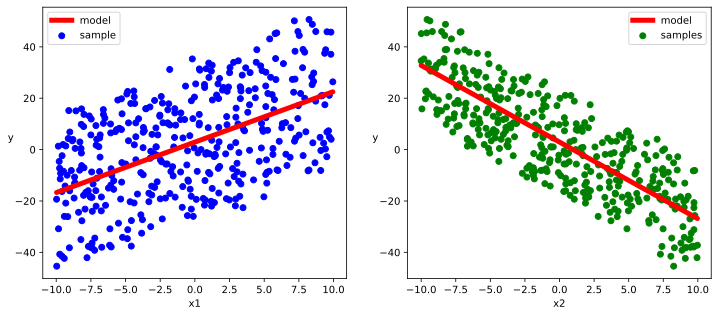

In [35]:
#visualizing the results
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize=(12, 5))
ax1 = plt.subplot(121)
ax1.scatter(X[:, 0], Y[:, 0], c = "b", label = "sample")
ax1.plot(X[:, 0], w[0]*X[:,0]+b[0], "-r", linewidth=5.0, label="model")
ax1.legend()

plt.xlabel("x1")
plt.ylabel("y", rotation = 0)

ax2 = plt.subplot(122)
ax2.scatter(X[:,1], Y[:,0], c = "g", label = "samples")
ax2.plot(X[:,1], w[1]*X[:,1]+b[0], "-r", linewidth=5.0, label="model")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y", rotation=0)

plt.show()

DNN Binary  Classification Model

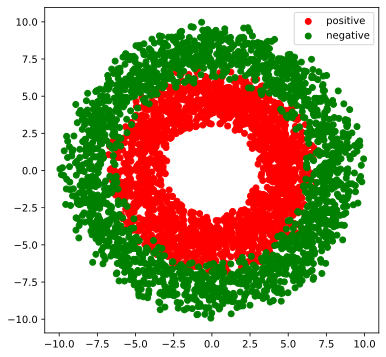

In [36]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Number of the positive/negative samples
n_positive,n_negative = 2000,2000

# Generating the positive samples with a distribution on a smaller ring
r_p = 5.0 + tf.random.truncated_normal([n_positive,1],0.0,1.0)
theta_p = tf.random.uniform([n_positive,1],0.0,2*np.pi) 
Xp = tf.concat([r_p*tf.cos(theta_p),r_p*tf.sin(theta_p)],axis = 1)
Yp = tf.ones_like(r_p)

# Generating the negative samples with a distribution on a larger ring
r_n = 8.0 + tf.random.truncated_normal([n_negative,1],0.0,1.0)
theta_n = tf.random.uniform([n_negative,1],0.0,2*np.pi) 
Xn = tf.concat([r_n*tf.cos(theta_n),r_n*tf.sin(theta_n)],axis = 1)
Yn = tf.zeros_like(r_n)

# Assembling all samples
X = tf.concat([Xp,Xn],axis = 0)
Y = tf.concat([Yp,Yn],axis = 0)


# Visualizing the data
plt.figure(figsize = (6,6))
plt.scatter(Xp[:,0].numpy(),Xp[:,1].numpy(),c = "r")
plt.scatter(Xn[:,0].numpy(),Xn[:,1].numpy(),c = "g")
plt.legend(["positive","negative"])

In [37]:
# Create the generator of the data pipeline
def data_iter(features, labels, batch_size=8):
    num_examples = len(features)
    indices = list(range(num_examples))
    np.random.shuffle(indices)  # Randomizing the reading order of the samples
    for i in range(0, num_examples, batch_size):
        indexs = indices[i: min(i + batch_size, num_examples)]
        yield tf.gather(features,indexs), tf.gather(labels,indexs)
        
# Testing data pipeline
batch_size = 10
(features,labels) = next(data_iter(X,Y,batch_size))
print(features)
print(labels)

tf.Tensor(
[[ 0.9686742   5.570914  ]
 [ 9.030799    0.94412065]
 [-3.5445824   2.0441914 ]
 [-1.0331569   7.606164  ]
 [-1.0835075   4.304695  ]
 [-3.2268417   8.149134  ]
 [-2.6569686   2.2239199 ]
 [ 2.8234327   6.700457  ]
 [-0.26388893  9.474229  ]
 [-1.362698    9.678345  ]], shape=(10, 2), dtype=float32)
tf.Tensor(
[[1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]], shape=(10, 1), dtype=float32)


In [50]:
class DNNModel(tf.Module):
  def __init__(self, name = None):
    super(DNNModel, self).__init__(name=name)
    self.w1 = tf.Variable(tf.random.truncated_normal([2,4]), dtype=tf.float32)
    self.b1 = tf.Variable(tf.zeros([1,4]), dtype=tf.float32)

    self.w2 = tf.Variable(tf.random.truncated_normal([4,8]), dtype=tf.float32)
    self.b2 = tf.Variable(tf.zeros([1,8]), dtype=tf.float32)

    self.w3 = tf.Variable(tf.random.truncated_normal([8,1]), dtype=tf.float32)
    self.b3 = tf.Variable(tf.zeros([1,1]), dtype=tf.float32)
  

  @tf.function
  def __call__(self, x):
    x = tf.nn.relu(x@self.w1 + self.b1)
    x = tf.nn.relu(x@self.w2 + self.b2)
    y = tf.nn.sigmoid(x@self.w3 + self.b3)
    return y
  
  @tf.function(input_signature=[tf.TensorSpec(shape=[None,1], dtype=tf.float32),
                                tf.TensorSpec(shape=[None,1], dtype=tf.float32)])
  def loss_func(self, y_true, y_pred):
    eps = 1e-7
    y_pred = tf.clip_by_value(y_pred, eps, 1.0-eps)
    bce = - y_true*tf.math.log(y_pred) - (1-y_true)*tf.math.log(1-y_pred)
    return tf.reduce_mean(bce)
  
  @tf.function(input_signature=[tf.TensorSpec(shape=[None,1], dtype=tf.float32),
                                tf.TensorSpec(shape=[None,1], dtype=tf.float32)])
  def metric_func(self, y_true, y_pred):
    y_pred = tf.where(y_pred>0.5, tf.ones_like(y_pred, dtype=tf.float32),
                      tf.zeros_like(y_pred, dtype=tf.float32))
    acc = tf.reduce_mean(1-tf.abs(y_true-y_pred))
    return acc

model = DNNModel()

In [51]:
# Testing the structure of model
batch_size = 10
(features,labels) = next(data_iter(X,Y,batch_size))

predictions = model(features)

loss = model.loss_func(labels,predictions)
metric = model.metric_func(labels,predictions)

tf.print("init loss:",loss)
tf.print("init metric",metric)

init loss: 1.59837663
init metric 0.9


In [52]:
print(len(model.trainable_variables))

6


In [54]:
@tf.function
def train_step(model, features, labels):
  with tf.GradientTape() as tape:
    predications = model(features)
    loss = model.loss_func(labels, predications)
  
  grads = tape.gradient(loss, model.trainable_variables)

  for p, dloss_dp in zip(model.trainable_variables, grads):
    p.assign(p - 0.001*dloss_dp)
  
  metric = model.metric_func(labels, predications)

  return loss, metric

def train_model(model, epochs):
  for epoch in tf.range(1, epochs+1):
    for features, labels in data_iter(X, Y, 100):
      loss, metric = train_step(model, features, labels)
    
    if epoch%100 == 0:
      printbar()
      tf.print("epoch =", epoch, "loss =", loss, "accuracy =", metric)
      
train_model(model,epochs = 600)

epoch = 100 loss = 0.693378 accuracy = 0.43
epoch = 200 loss = 0.648432493 accuracy = 0.56
epoch = 300 loss = 0.616167545 accuracy = 0.62
epoch = 400 loss = 0.606388 accuracy = 0.63
epoch = 500 loss = 0.603685617 accuracy = 0.66
epoch = 600 loss = 0.504746795 accuracy = 0.82


Text(0.5, 1.0, 'y_pred')

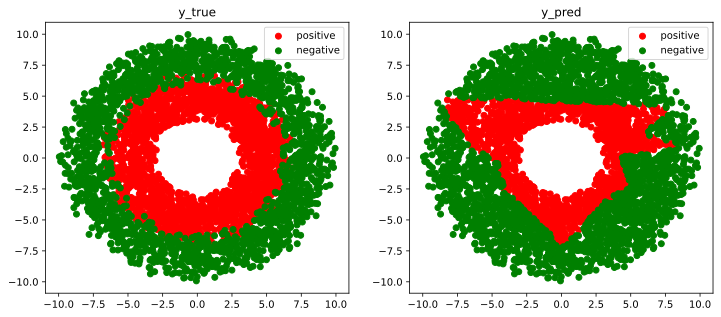

In [55]:
# Visualizing the results
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,5))
ax1.scatter(Xp[:,0],Xp[:,1],c = "r")
ax1.scatter(Xn[:,0],Xn[:,1],c = "g")
ax1.legend(["positive","negative"])
ax1.set_title("y_true")

Xp_pred = tf.boolean_mask(X,tf.squeeze(model(X)>=0.5),axis = 0)
Xn_pred = tf.boolean_mask(X,tf.squeeze(model(X)<0.5),axis = 0)

ax2.scatter(Xp_pred[:,0],Xp_pred[:,1],c = "r")
ax2.scatter(Xn_pred[:,0],Xn_pred[:,1],c = "g")
ax2.legend(["positive","negative"])
ax2.set_title("y_pred")

In [48]:
x = tf.constant([[1., 1.], [2., 2.]])
print(tf.reduce_mean(x))
print(tf.reduce_mean(x, 0))
print(tf.reduce_mean(x, 1))

tf.Tensor(1.5, shape=(), dtype=float32)
tf.Tensor([1.5 1.5], shape=(2,), dtype=float32)
tf.Tensor([1. 2.], shape=(2,), dtype=float32)


In [56]:
print(Xp_pred)
print(Xn_pred)

tf.Tensor(
[[ 1.6706749 -4.977765 ]
 [-1.461696  -4.4443107]
 [-4.3272595  2.3464303]
 ...
 [-6.4194746  3.3596416]
 [-5.9640436  2.1589708]
 [-4.869847   4.198996 ]], shape=(1441, 2), dtype=float32)
tf.Tensor(
[[-1.2481238   5.885184  ]
 [ 3.3668852  -3.7633307 ]
 [-4.458935   -3.5416572 ]
 ...
 [-3.0206661   6.5472956 ]
 [-0.18769333  7.2924256 ]
 [-5.704245   -5.5303206 ]], shape=(2559, 2), dtype=float32)
